# Customer Churn Prediction
## By : Mohamed Adam Baccouche 

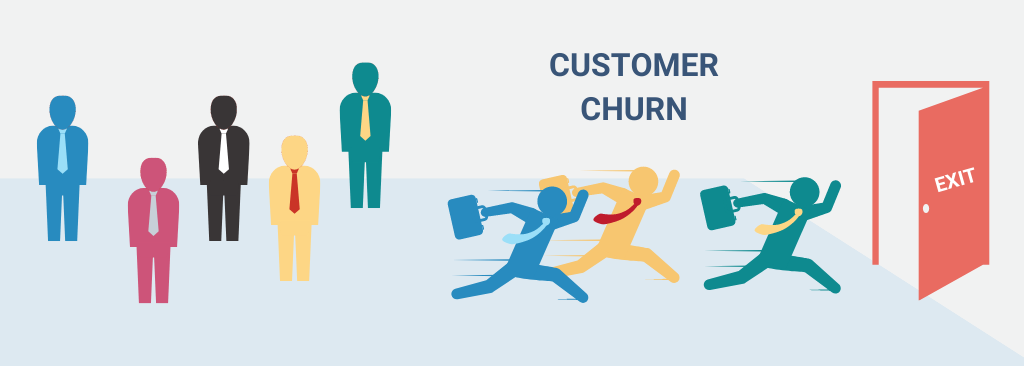

# Introduction :
Customer Churn is a major problem in the world of banking , therefor it is vital to try to predict it beforehand to take all major precautions . in this project we will utilize various machine learning techniques and models to modelise such a predictive test. 

#  Uploading The Data

In [564]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [565]:
data = pd.read_csv("C:/Users/moham/Desktop/churn.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [566]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
data.drop(columns=columns_to_drop, inplace=True)

In [567]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 1) EDA

In [568]:
# Categorical variables list
categorical_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Numerical variables list
numerical_vars = [col for col in data.columns if col not in categorical_vars]

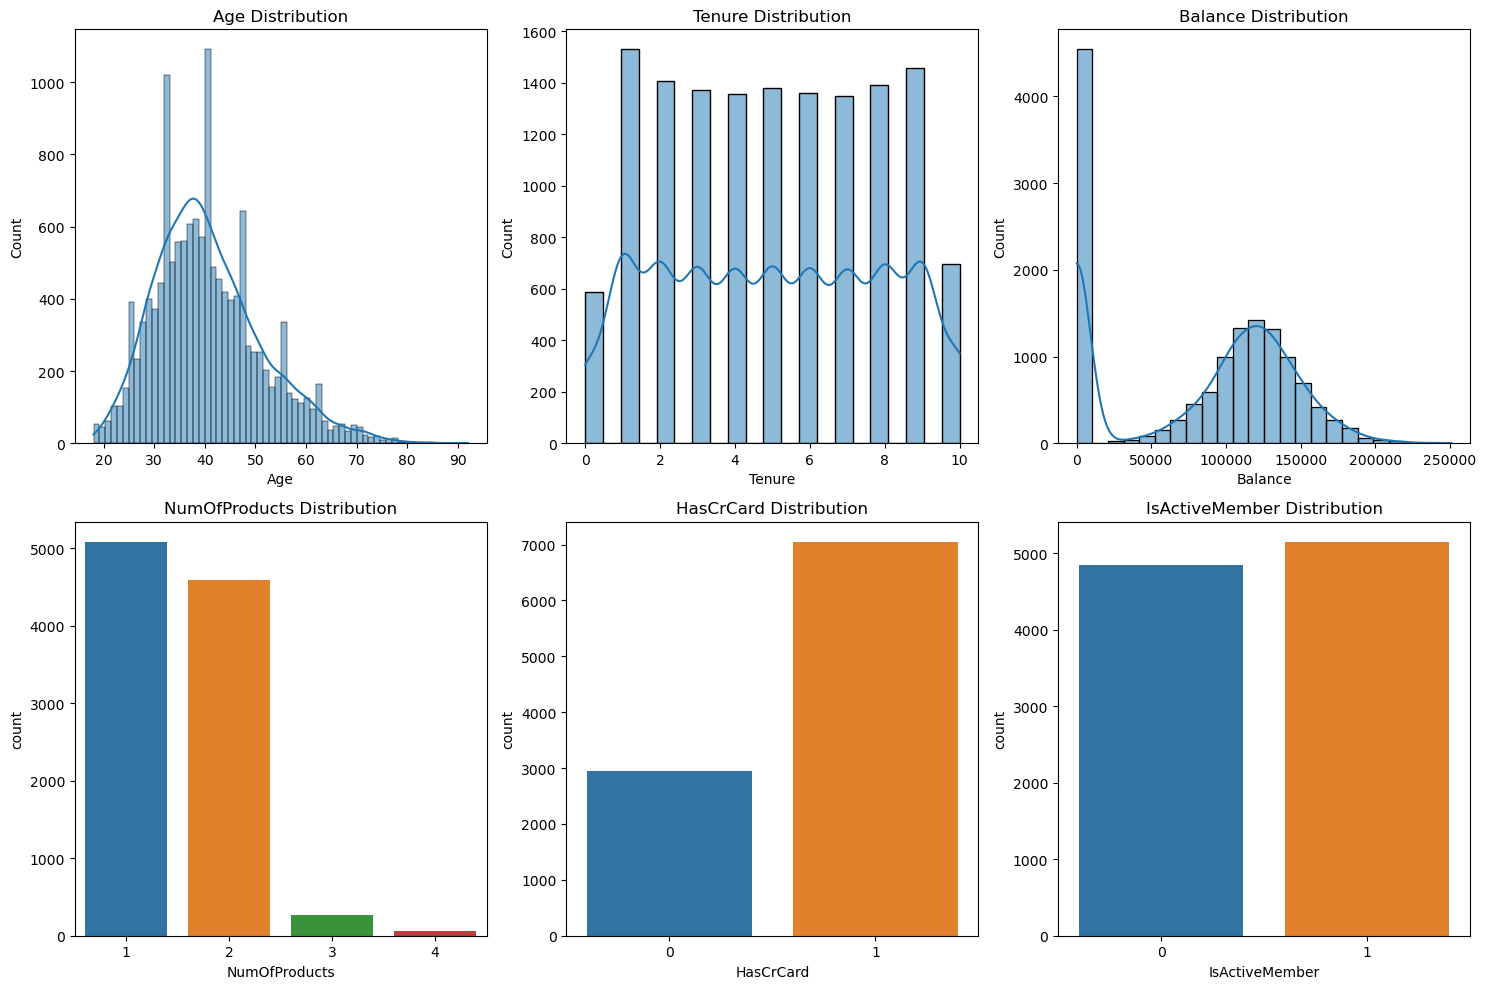

In [569]:
variables = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, variable in enumerate(variables):
    if variable == 'NumOfProducts':
        sns.countplot(x=variable, data=data, ax=axes[i], order=[1, 2, 3, 4])
    elif variable in ['HasCrCard', 'IsActiveMember']:
        sns.countplot(x=variable, data=data, ax=axes[i])
    else:
        sns.histplot(df[variable], ax=axes[i], kde=True)
    axes[i].set_title(f'{variable} Distribution')
plt.tight_layout()
plt.show()

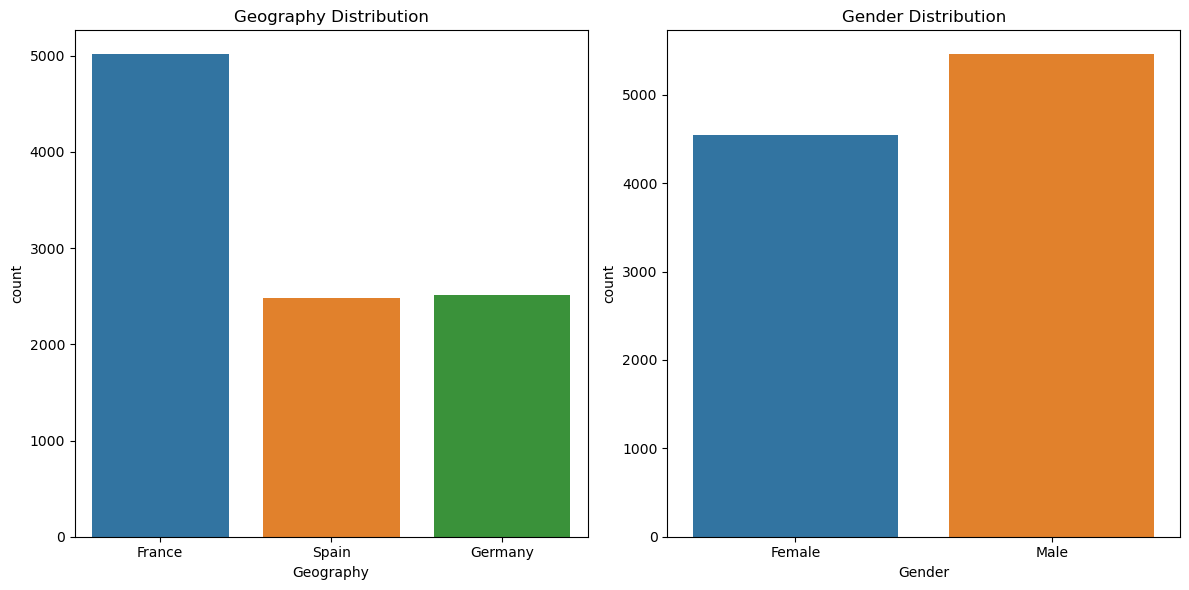

In [570]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
variables = ['Geography', 'Gender']

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot each categorical variable in a separate subplot
for i, variable in enumerate(variables):
    sns.countplot(x=variable, data=data, ax=axes[i])
    axes[i].set_title(f'{variable} Distribution')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

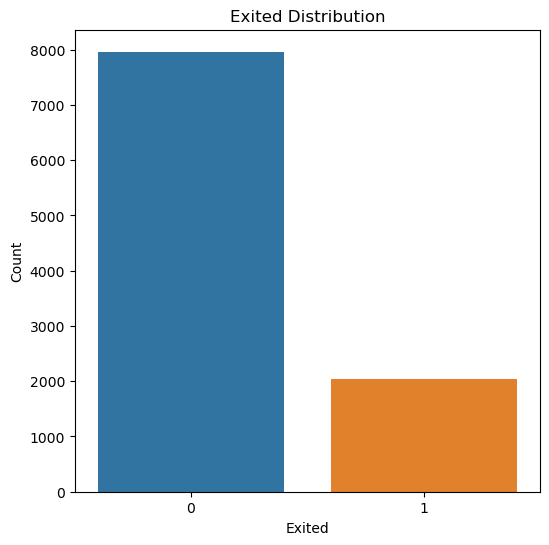

In [571]:

# Create a countplot for the target variable 'Exited'
plt.figure(figsize=(6, 6))
sns.countplot(x='Exited', data=data)
plt.title('Exited Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()


In [572]:
import pandas as pd

# Use describe() to get summary statistics for numerical variables
summary_stats = data[numerical_vars].describe().transpose()

# Calculate additional statistics if needed (e.g., median, standard deviation, etc.)

# Display the summary statistics table
summary_stats

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


# 2) Data Preprocessing: 

In [573]:
nan_percentages = (data.isna().sum() / len(df)) * 100
nan_percentages

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

# Smote
Our dataset is unbalanced with about 80% Existing clients and 20% are none existant , therefor we must try to balance using this method called Smote that uses a duplication method that shead more light on the minority class

In [574]:
# Assuming your dataset is stored in a DataFrame called 'data'
# Separate features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

# Separate majority and minority classes
majority_class = data[data['Exited'] == 0]
minority_class = data[data['Exited'] == 1]

# Calculate the difference in the number of observations between classes
n_majority = len(majority_class)
n_minority = len(minority_class)
n_samples_to_add = n_majority - n_minority

# Duplicate observations in the minority class to balance the dataset
oversampled_minority = minority_class.sample(n=n_samples_to_add, replace=True, random_state=42)

# Concatenate the majority class with the oversampled minority class
balanced_data = pd.concat([majority_class, oversampled_minority], axis=0)

# Shuffle the balanced dataset
data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [575]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,850,France,Male,55,6,0.00,1,1,0,944.41,1
1,652,France,Female,34,6,97435.85,2,1,1,104331.76,0
2,669,Spain,Male,51,3,88827.53,1,0,0,85250.77,1
3,705,Spain,Female,47,3,63488.70,1,0,1,28640.92,1
4,677,Spain,Female,35,0,0.00,2,0,0,76637.38,0
...,...,...,...,...,...,...,...,...,...,...,...
13884,683,France,Male,38,7,109346.13,2,1,0,102665.92,0
13885,562,France,Male,37,2,0.00,1,0,1,52525.15,1
13886,606,Spain,Male,34,3,161572.24,1,0,1,191076.22,0
13887,678,France,Female,32,5,0.00,2,1,0,90284.47,0


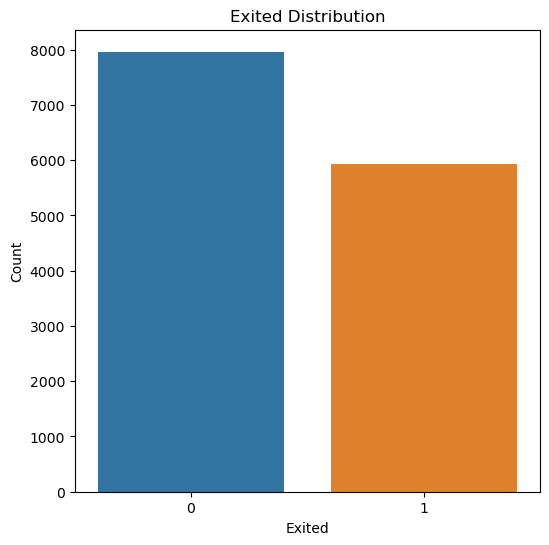

In [576]:
# Create a countplot for the target variable 'Exited'
plt.figure(figsize=(6, 6))
sns.countplot(x='Exited', data=data)
plt.title('Exited Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()


In [577]:
# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Extracting categorical columns
cat_columns = ['Geography', 'Gender']

# Specifying all possible categories for each feature
categories = [['France', 'Germany', 'Spain', 'France'], ['Female', 'Male']]

# Initializing OneHotEncoder with specified categories
encoder = OneHotEncoder(categories=categories, drop='first', sparse=False)

# Performing one-hot encoding
encoded_cols = pd.DataFrame(encoder.fit_transform(data[cat_columns]), columns=encoder.get_feature_names_out(cat_columns))

# Dropping original categorical columns from the DataFrame
data = data.drop(columns=cat_columns)


# Concatenating the encoded columns with the original DataFrame
data = pd.concat([data, encoded_cols], axis=1)

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [578]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Geography_France,Gender_Male
0,850,55,6,0.00,1,1,0,944.41,1,0.0,0.0,1.0,1.0
1,652,34,6,97435.85,2,1,1,104331.76,0,0.0,0.0,1.0,0.0
2,669,51,3,88827.53,1,0,0,85250.77,1,0.0,1.0,0.0,1.0
3,705,47,3,63488.70,1,0,1,28640.92,1,0.0,1.0,0.0,0.0
4,677,35,0,0.00,2,0,0,76637.38,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13884,683,38,7,109346.13,2,1,0,102665.92,0,0.0,0.0,1.0,1.0
13885,562,37,2,0.00,1,0,1,52525.15,1,0.0,0.0,1.0,1.0
13886,606,34,3,161572.24,1,0,1,191076.22,0,0.0,1.0,0.0,1.0
13887,678,32,5,0.00,2,1,0,90284.47,0,0.0,0.0,1.0,0.0


# Select K best Variables 

In [579]:
df=data.copy()

In [580]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Initialize SelectKBest with the f_classif scoring function
selector = SelectKBest(score_func=f_classif)

# Fit the selector to the data
selector.fit(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Filter the dataset to keep only the selected features
X_selected = X[selected_features]

In [581]:
X_selected

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Geography_France,Gender_Male
0,850,55,0.00,1,1,0,0.0,0.0,1.0,1.0
1,652,34,97435.85,2,1,1,0.0,0.0,1.0,0.0
2,669,51,88827.53,1,0,0,0.0,1.0,0.0,1.0
3,705,47,63488.70,1,0,1,0.0,1.0,0.0,0.0
4,677,35,0.00,2,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13884,683,38,109346.13,2,1,0,0.0,0.0,1.0,1.0
13885,562,37,0.00,1,0,1,0.0,0.0,1.0,1.0
13886,606,34,161572.24,1,0,1,0.0,1.0,0.0,1.0
13887,678,32,0.00,2,1,0,0.0,0.0,1.0,0.0


In [582]:
columns_to_drop = ['Tenure', 'EstimatedSalary']
data.drop(columns=columns_to_drop, inplace=True)

# 3) Models:

# Logistic regression

In [583]:
df_logistic=data.copy()

In [584]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select only numerical columns for normalization
numerical_columns = df_logistic.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from normalization
binary_variables = ["NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]

# Exclude Geography and Gender as well
exclude_variables = binary_variables + ["Geography", "Gender"]
numerical_columns = numerical_columns.difference(exclude_variables)

# Apply Min-Max scaling to numerical columns
df_logistic[numerical_columns] = scaler.fit_transform(df_logistic[numerical_columns])


In [585]:
df_logistic

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Geography_France,Gender_Male
0,1.000,0.500000,0.000000,1,1,0,1,0.0,0.0,1.0,1.0
1,0.604,0.216216,0.388348,2,1,1,0,0.0,0.0,1.0,0.0
2,0.638,0.445946,0.354038,1,0,0,1,0.0,1.0,0.0,1.0
3,0.710,0.391892,0.253046,1,0,1,1,0.0,1.0,0.0,0.0
4,0.654,0.229730,0.000000,2,0,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13884,0.666,0.270270,0.435819,2,1,0,0,0.0,0.0,1.0,1.0
13885,0.424,0.256757,0.000000,1,0,1,1,0.0,0.0,1.0,1.0
13886,0.512,0.216216,0.643976,1,0,1,0,0.0,1.0,0.0,1.0
13887,0.656,0.189189,0.000000,2,1,0,0,0.0,0.0,1.0,0.0


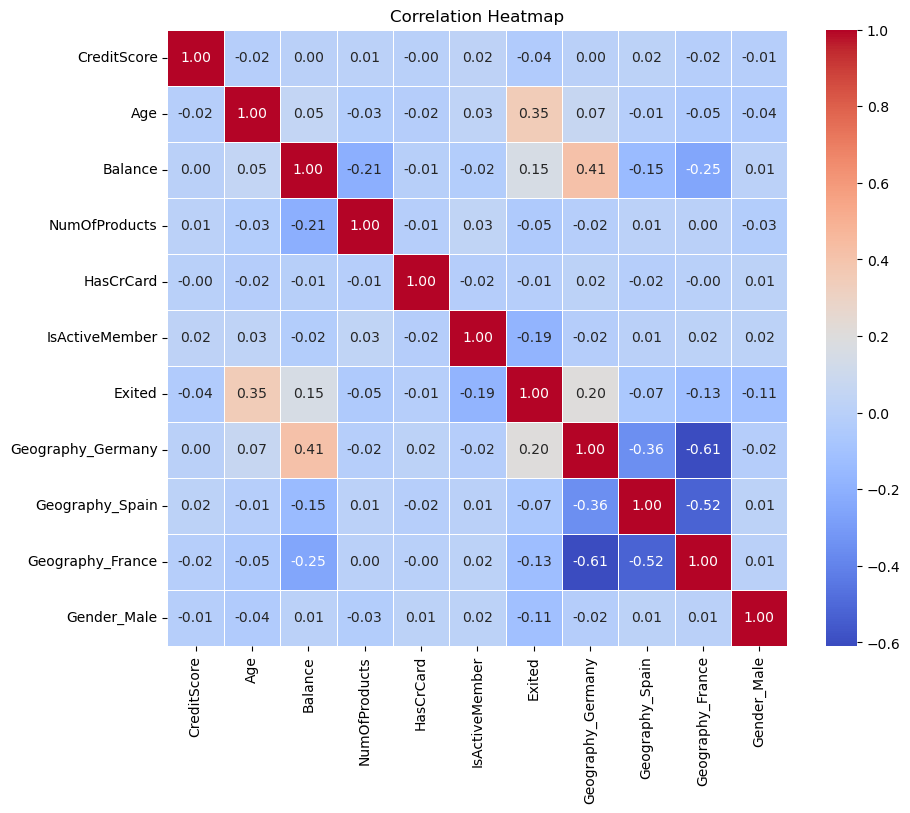

In [586]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_logistic.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [587]:
df_logistic

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Geography_France,Gender_Male
0,1.000,0.500000,0.000000,1,1,0,1,0.0,0.0,1.0,1.0
1,0.604,0.216216,0.388348,2,1,1,0,0.0,0.0,1.0,0.0
2,0.638,0.445946,0.354038,1,0,0,1,0.0,1.0,0.0,1.0
3,0.710,0.391892,0.253046,1,0,1,1,0.0,1.0,0.0,0.0
4,0.654,0.229730,0.000000,2,0,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13884,0.666,0.270270,0.435819,2,1,0,0,0.0,0.0,1.0,1.0
13885,0.424,0.256757,0.000000,1,0,1,1,0.0,0.0,1.0,1.0
13886,0.512,0.216216,0.643976,1,0,1,0,0.0,1.0,0.0,1.0
13887,0.656,0.189189,0.000000,2,1,0,0,0.0,0.0,1.0,0.0


In [588]:
X = df_logistic.drop('Exited', axis=1)
y = df_logistic['Exited']

In [589]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [590]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [591]:
y_pred = model.predict(X_test)

In [592]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)

# Create a DataFrame to display the evaluation metrics
evaluation_df_log = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_log, precision_log, recall_log, f1_log]
})

print("Evaluation Metrics:")
evaluation_df_log


Evaluation Metrics:


,Metric,Score
0,Accuracy,0.697624
1,Precision,0.692865
2,Recall,0.552350
3,F1-Score,0.614679


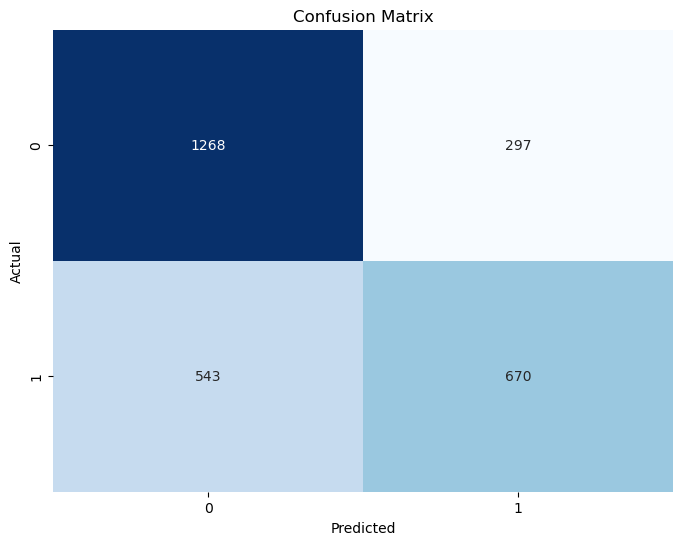

In [593]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_pred contains your predicted labels (0 or 1)
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

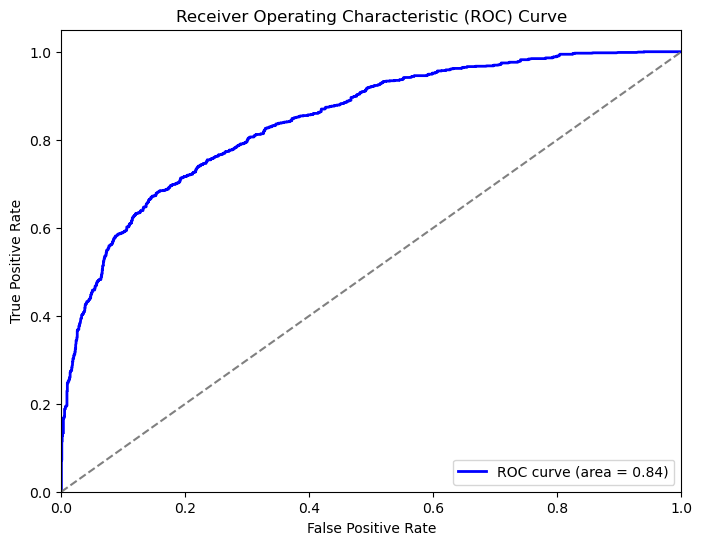

In [594]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities of positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc_Log = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_Log)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## we can conclude from these results that the logistic regression model have performed a reasonably to the task of predicting the client churn . with a solid 0.7 as accuracy and 0.61 F1 score and with an AUC of 0.84 . 

# Decision Tree

In [595]:
df_DT=data.copy()

In [596]:
df_DT

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Geography_France,Gender_Male
0,850,55,0.00,1,1,0,1,0.0,0.0,1.0,1.0
1,652,34,97435.85,2,1,1,0,0.0,0.0,1.0,0.0
2,669,51,88827.53,1,0,0,1,0.0,1.0,0.0,1.0
3,705,47,63488.70,1,0,1,1,0.0,1.0,0.0,0.0
4,677,35,0.00,2,0,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13884,683,38,109346.13,2,1,0,0,0.0,0.0,1.0,1.0
13885,562,37,0.00,1,0,1,1,0.0,0.0,1.0,1.0
13886,606,34,161572.24,1,0,1,0,0.0,1.0,0.0,1.0
13887,678,32,0.00,2,1,0,0,0.0,0.0,1.0,0.0


In [597]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Assuming X and y are your feature matrix and target vector respectively for decision tree
X = df_DT.drop('Exited', axis=1)
y = df_DT['Exited']

In [598]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [599]:
# Initializing and training the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [600]:

# Making predictions on the test set
y_pred = tree_model.predict(X_test)



In [601]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

# Create a DataFrame to display the evaluation metrics
evaluation_df_dt = pd.DataFrame({
    'Metric': ['Accuracy_dt', 'Precision_dt', 'Recall_dt', 'F1-Score_dt'],
    'Score': [accuracy_dt, precision_dt, recall_dt, f1_dt]
})

print("Evaluation Metrics:")
evaluation_df_dt


Evaluation Metrics:


,Metric,Score
0,Accuracy_dt,0.903528
1,Precision_dt,0.841155
2,Recall_dt,0.960429
3,F1-Score_dt,0.896844


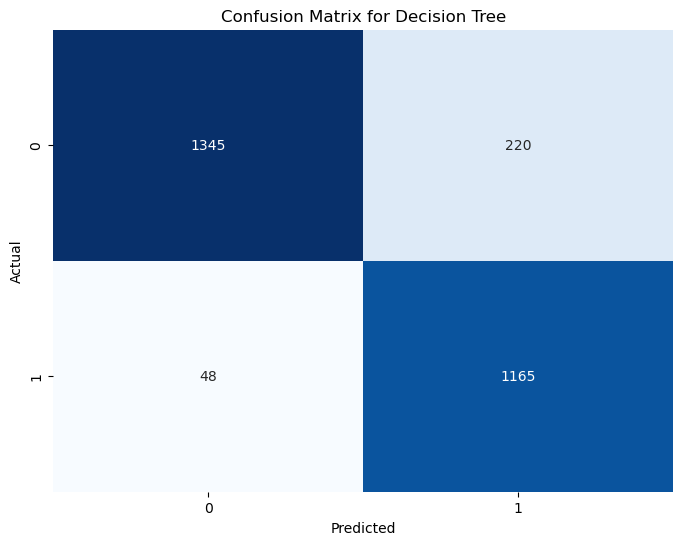

In [602]:
# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


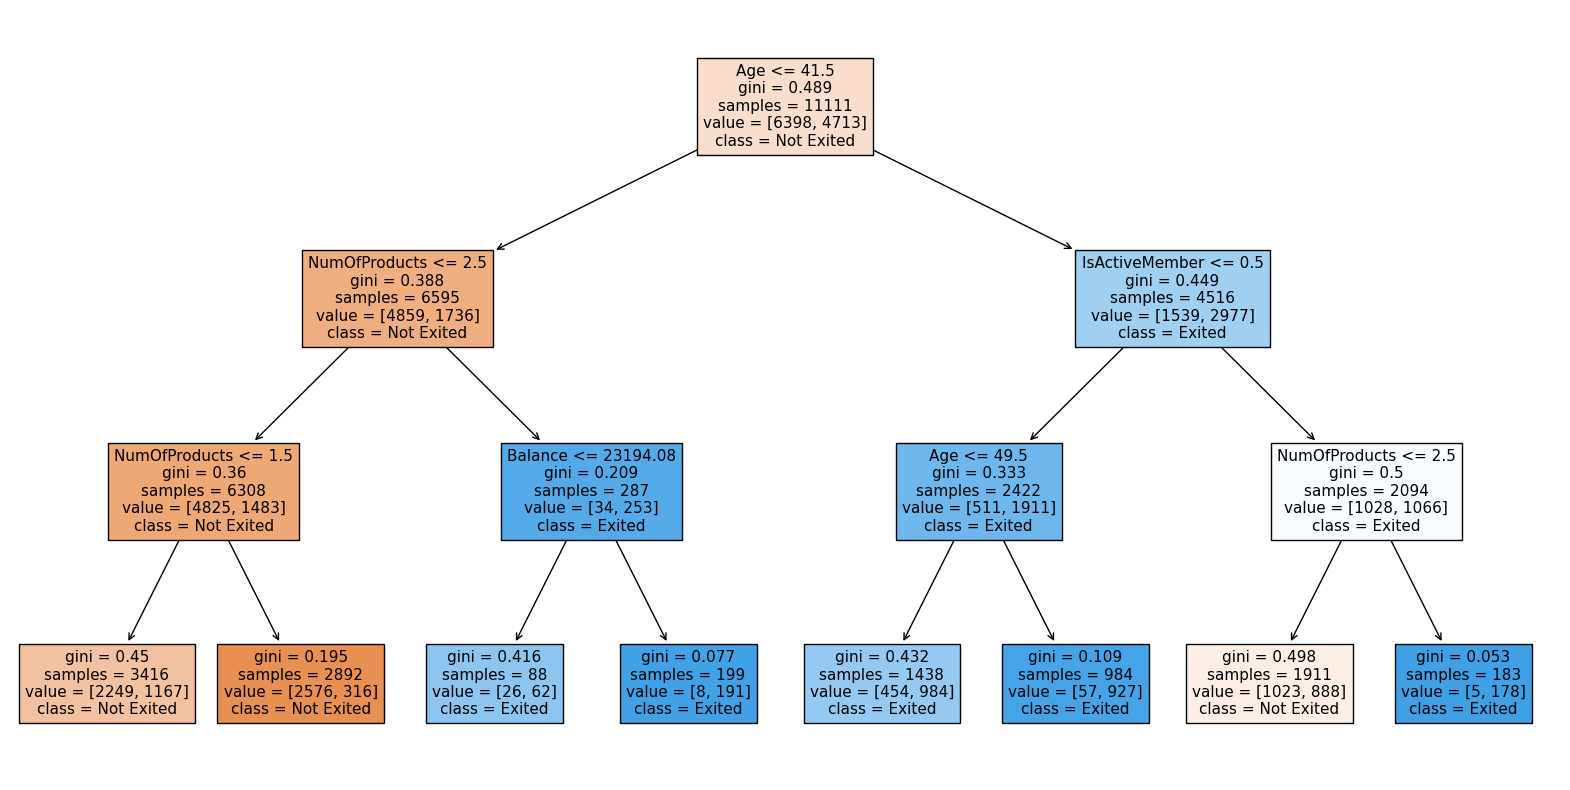

In [603]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initializing the DecisionTreeClassifier with max_depth=5
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Training the model
tree_model.fit(X_train, y_train)

# Plotting the decision tree with limited depth
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=df_DT.columns[:-1], class_names=['Not Exited', 'Exited'])
plt.show()


## The Gini impurity progressively **decreases** as the decision tree splits the data. A lower Gini signifies better class separation, meaning the data at each node becomes increasingly pure. This purity refers to the dominance of a single class (Exited/Not Exited) within a node. As the tree progresses, it aims to reach nodes where nearly all data points belong to the same class, achieving the highest purity. 

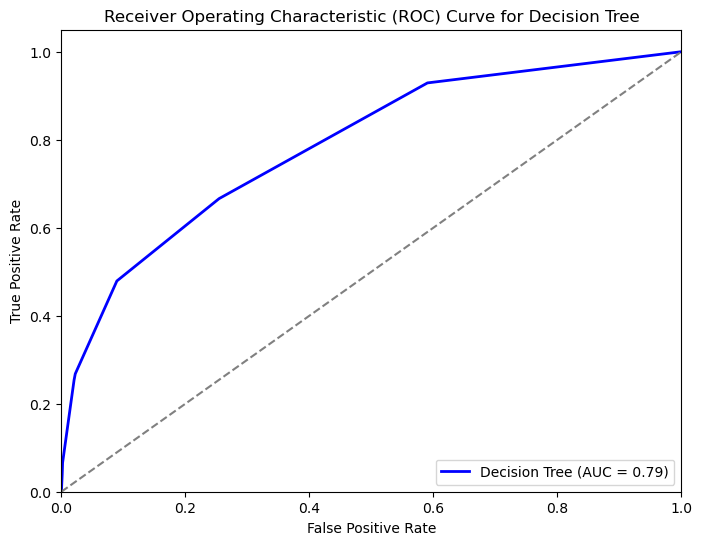

In [604]:
# Calculate predicted probabilities for Decision Tree
y_pred_proba_dt = tree_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


## The decision Tree model have performed very good and managed to capture 90% of the real result accurately , added to that it managed to get an F1 score of 0.896 and AUC 0.79 which also solidifes the success of this model . 

# Random Forest 

In [605]:
df_DT=df_DT.copy()

In [606]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df_DT'
# Separate features and target variable
X = df_DT.drop('Exited', axis=1)
y = df_DT['Exited']

In [607]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [608]:
# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [609]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [610]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Create a DataFrame to display the evaluation metrics
evaluation_df_rf = pd.DataFrame({
    'Metric': ['Accuracy_rf', 'Precision_rf', 'Recall_rf', 'F1-Score_rf'],
    'Score': [accuracy_rf, precision_rf, recall_rf, f1_rf]
})

print("Evaluation Metrics for Random Forest:")
evaluation_df_rf


Evaluation Metrics for Random Forest:


,Metric,Score
0,Accuracy_rf,0.770698
1,Precision_rf,0.800000
2,Recall_rf,0.633141
3,F1-Score_rf,0.706857


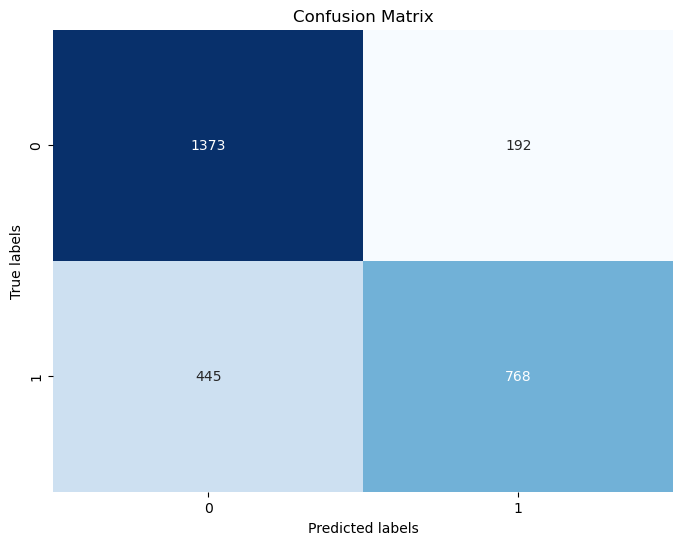

In [611]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


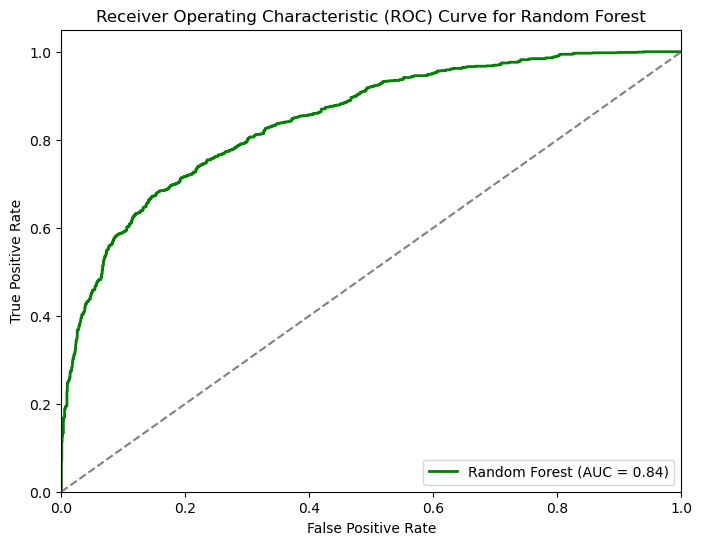

In [612]:
# Calculate predicted probabilities for Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


## The randodm forest model performed well also to our use-case with roughly 77% accurate predictions and a solid 70% F1 score supported by 84% AUC , its safe to say that this model have performed very well 

# 4) Evaluation:

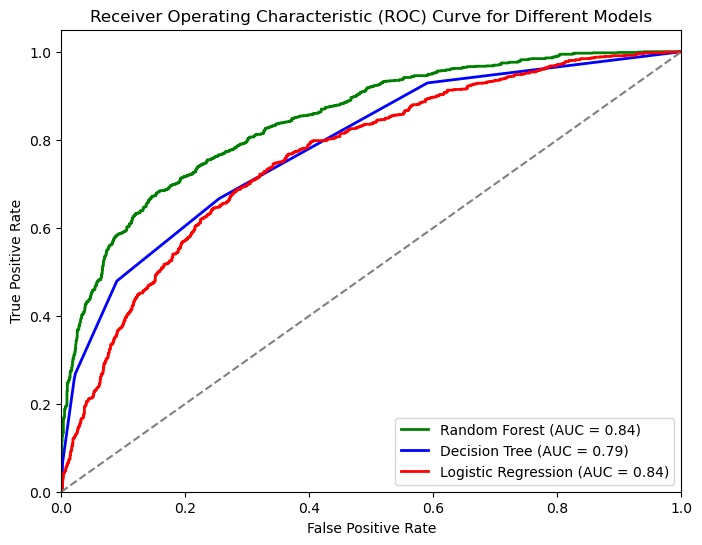

In [613]:

# Plotting ROC curves for all three models
plt.figure(figsize=(8, 6))

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Plot ROC curve for Decision Tree
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)

# Plot ROC curve for Logistic Regression
plt.plot(fpr_log, tpr_log, color='red', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_Log)

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Different Models')
plt.legend(loc='lower right')
plt.show()


In [618]:
# Create DataFrames for each model's evaluation metrics
evaluation_df_dt.rename(columns={'Score': 'Score_dt'}, inplace=True)
evaluation_df_log.rename(columns={'Score': 'Score_log'}, inplace=True)
evaluation_df_rf.rename(columns={'Score': 'Score_rf'}, inplace=True)

# Combine the evaluation metrics into one DataFrame
combined_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [evaluation_df_dt.loc[0, 'Score_dt'], evaluation_df_log.loc[0, 'Score_log'], evaluation_df_rf.loc[0, 'Score_rf']],
    'Precision': [evaluation_df_dt.loc[1, 'Score_dt'], evaluation_df_log.loc[1, 'Score_log'], evaluation_df_rf.loc[1, 'Score_rf']],
    'Recall': [evaluation_df_dt.loc[2, 'Score_dt'], evaluation_df_log.loc[2, 'Score_log'], evaluation_df_rf.loc[2, 'Score_rf']],
    'F1-Score': [evaluation_df_dt.loc[3, 'Score_dt'], evaluation_df_log.loc[3, 'Score_log'], evaluation_df_rf.loc[3, 'Score_rf']]
})

print("Combined Evaluation Metrics for all Models:")
combined_df


Combined Evaluation Metrics for all Models:


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.903528,0.841155,0.960429,0.896844
1,Logistic Regression,0.697624,0.692865,0.552350,0.614679
2,Random Forest,0.770698,0.800000,0.633141,0.706857


## we can conclude from these results that the Decision tree outpace all of them and earned the title of "best model" for our use-case , because it had outperformed the other metrics with 90% acc , and 89% F1 score 

# Conclusion:

After all these tests , we have managed to build a model that honored the requirement of our project , which is the Decision tree . it managed to capture the spotlight from the rest with its impressive accuracy and F1 score . this way we have utilized all our expertise to help the banking industry in predicting a crisis before hand and act upon it .